# Analisis del Clima para la Región circundante a Gral. Fco. R. Murguía
Por Guillermo Hernandez

Este documento forma parte de los análisis preeliminares para un modelo predictivo de machine learning sobre los precios de principales granos de producción de la región circundante al pueblo de nieves.

En este documento se analiza el clima regional circundante del pueblo de Nieves, General Francisco R. Murguía, Zac. y se toman datos de las estaciones 32001 (Agua Nueva, Villa de Cos), 32004 (Estación Camacho, Mazapil), 32005 (Cañitas de Felipe Pescador; Cabecera), 32028 (Juan Aldama; Cabecera), 32038 (Nieves, Gral. Fco. R. Murguía), 32045 (Río Grande; Cabecera), 32049 (San Francisco, Gral. Fco. R. Murguía), 32050 (San Gil, Gral. Fco. R. Murguía) a fecha de 13/09/2024, con los datos disponibles a septiembre del 2024. Los datos son recopilados de manera diaria, y las variables recolectadas son: precipitación (mm), temperatura máxima (ºC), temperatura mínima (ºC), y evaporación (mm).

El análisis consta de 3 partes, y muestra datos en bajo nivel para su fácil interpretación, así como algunos gráficos interactivos:

1. Obtención y preparación de datos.

    Los datos son obtenidos de la base de datos climatólogica de página de la [coordinación general del servicio meteorológico nacional](https://smn.conagua.gob.mx/es/climatologia/informacion-climatologica/normales-climatologicas-por-estado?estado=ags). Naturalmente los datos se encuentran en un formato .txt y es necesario llevarlos a un formato que permita su fácil manejo

2. Datos y distribuciones.
    1. Presenta los datos diaros
    2. Presenta las distribuciones estadísticas de los datos

3. Análisis de precipitaciones
    1. Analísis de precipitación histórica por més
    2. Análisis de precipitación histórica por año

4. Análisis de temperaturas y evaporación
    1. Análisis de temperaturas y evaporación mensual histórico
    2. Análisis de temperaturas y evaporación anual histórico

In [1]:
# importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import calendar

In [2]:
# procesado, limpiado y arreglo de datos
daily_agua_n = pd.read_csv('weather_data/daily/agua_nueva.txt', skiprows=25, sep=r'\s+', names =['date','rain_an','evap_an','t_max_an','t_min_an'], index_col='date')
daily_camacho = pd.read_csv('weather_data/daily/camacho.txt',skiprows=25, sep=r'\s+', names =['date','rain_cam','evap_cam','t_max_cam','t_min_cam'], index_col='date')
daily_canitas = pd.read_csv('weather_data/daily/canitas.txt',skiprows=25, sep=r'\s+', names =['date','rain_can','evap_can','t_max_can','t_min_can'], index_col='date')
daily_juan_a = pd.read_csv('weather_data/daily/juan_aldama.txt',skiprows=25, sep=r'\s+', names =['date','rain_ja','evap_ja','t_max_ja','t_min_ja'], index_col='date')
daily_nieves = pd.read_csv('weather_data/daily/nieves.txt', skiprows=25, sep=r'\s+',names=['date','rain_n','evap_n','t_max_n','t_min_n'], index_col='date')
daily_rio_g = pd.read_csv('weather_data/daily/rio_grande.txt',skiprows=25, sep=r'\s+', names =['date','rain_rg','evap_rg','t_max_rg','t_min_rg'], index_col='date')
daily_san_f = pd.read_csv('weather_data/daily/san_francisco.txt',skiprows=25, sep=r'\s+', names =['date','rain_sf','evap_sf','t_max_sf','t_min_sf'], index_col='date')
daily_san_g = pd.read_csv('weather_data/daily/san_gil.txt',skiprows=25, sep=r'\s+', names =['date','rain_sg','evap_sg','t_max_sg','t_min_sg'], index_col='date')

daily = pd.concat([daily_rio_g, daily_camacho, daily_canitas, daily_juan_a, daily_nieves, daily_agua_n, daily_san_f, daily_san_g], join='outer', axis=1)
daily.index = pd.to_datetime(daily.index)
daily.dropna(how='all', inplace=True)
daily.replace('NULO', np.nan, inplace=True)
daily.sort_index(inplace=True)
daily = daily.astype(float)

Para ver que datos se pueden tomar y tener datos promedio usaremos un mapa de correlaciones, o contar los datos faltantes, de aquí obtenemos que los datos de evaporación de agua nueva y camacho no tienen correlación.

In [3]:
total = len(daily)
for col in daily.columns:
    number = daily[col].count()
    print(f'Datos en {col}: {number}, Datos faltantes: {total-number}, % faltante = {((total-number)/total)*100}')

Datos en rain_rg: 24228, Datos faltantes: 11198, % faltante = 31.60955230621577
Datos en evap_rg: 6687, Datos faltantes: 28739, % faltante = 81.12403319595776
Datos en t_max_rg: 24118, Datos faltantes: 11308, % faltante = 31.920058713938914
Datos en t_min_rg: 24118, Datos faltantes: 11308, % faltante = 31.920058713938914
Datos en rain_cam: 20877, Datos faltantes: 14549, % faltante = 41.06870659967255
Datos en evap_cam: 21, Datos faltantes: 35405, % faltante = 99.94072150398013
Datos en t_max_cam: 13194, Datos faltantes: 22232, % faltante = 62.756167786371584
Datos en t_min_cam: 13194, Datos faltantes: 22232, % faltante = 62.756167786371584
Datos en rain_can: 25813, Datos faltantes: 9613, % faltante = 27.135437249477786
Datos en evap_can: 3127, Datos faltantes: 32299, % faltante = 91.17314966408853
Datos en t_max_can: 20458, Datos faltantes: 14968, % faltante = 42.251453734545244
Datos en t_min_can: 20458, Datos faltantes: 14968, % faltante = 42.251453734545244
Datos en rain_ja: 19743, 

Sin embargo, dado que los datos presentan perdidas que no se suelen solapar, tomaré el promedio de los datos sin distinción

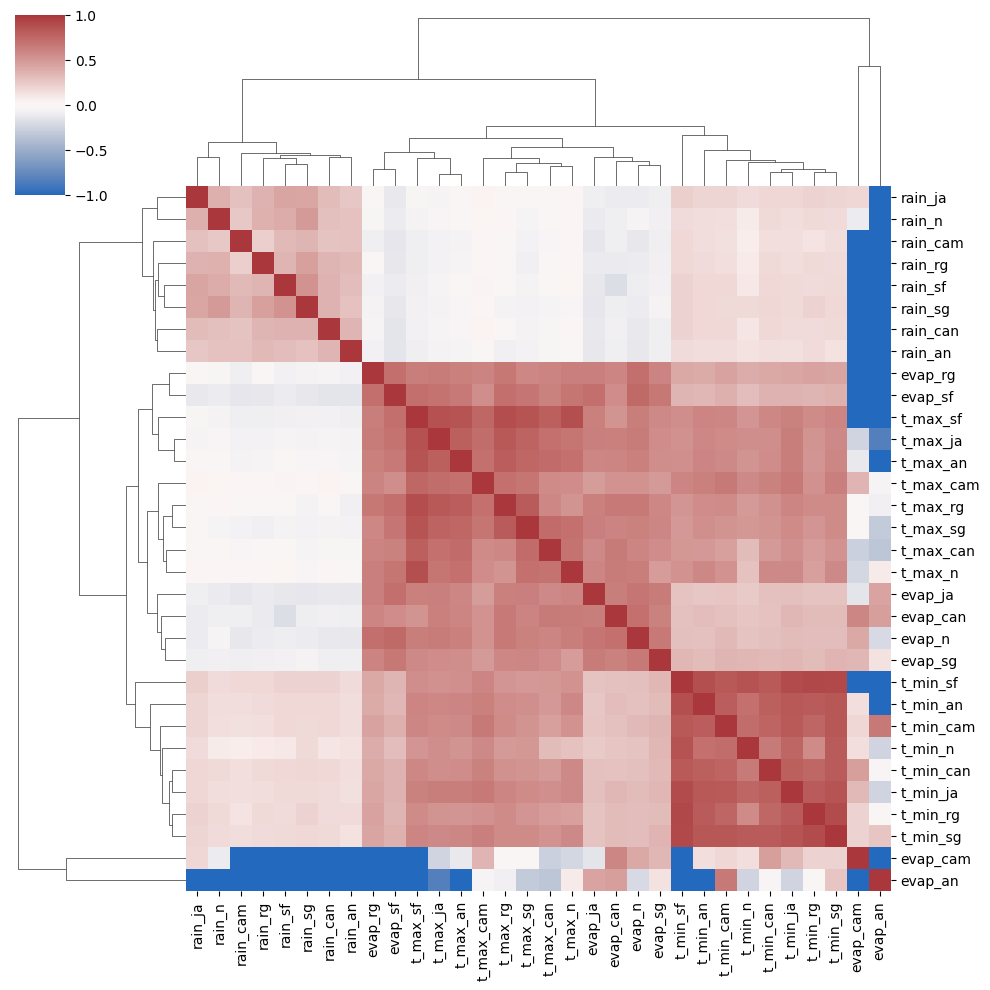

In [4]:
g = sns.clustermap(daily.corr().fillna(-1), center = 0, cmap = 'vlag')

In [5]:
daily['mean_rain'] = daily[[col for col in daily.columns if 'rain' in col]].mean(axis=1)
daily['mean_t_max'] = daily[[col for col in daily.columns if 't_max' in col]].mean(axis=1)
daily['mean_t_min'] = daily[[col for col in daily.columns if 't_min' in col]].mean(axis=1)
daily['mean_evap'] = daily[[col for col in daily.columns if 'evap' in col]].mean(axis=1)
daily_mean = daily[[col for col in daily.columns if 'mean' in col]]

In [6]:
px.line(daily_mean)

### Distribuciones estadísticas

Dias totales: 35426


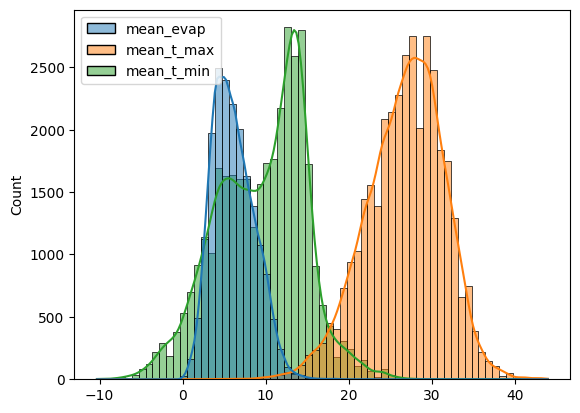

In [7]:
sns.histplot(daily_mean[['mean_evap','mean_t_max','mean_t_min']], kde=True)
print('Dias totales:', total)

<Axes: ylabel='Count'>

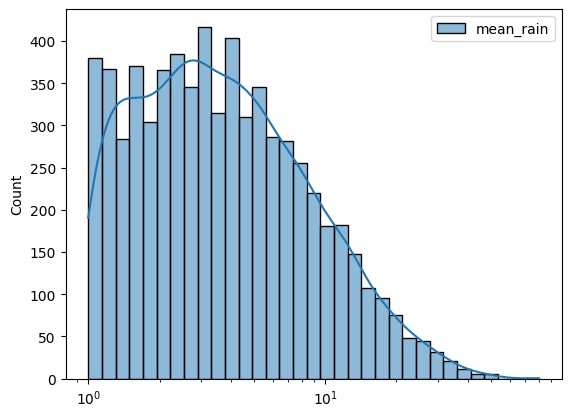

In [8]:
sns.histplot(daily_mean[daily_mean['mean_rain']>=1].loc[:,['mean_rain']], log_scale=True, kde=True)

In [9]:
# Calculus of days of rain in the year
rain_days = daily_mean[daily_mean['mean_rain']>=1].loc[:,['mean_rain']].count()
light_rain_days = daily_mean[(daily_mean['mean_rain']>=1) & (daily_mean['mean_rain']<4)].loc[:,['mean_rain']].count()
high_rain_days = daily_mean[(daily_mean['mean_rain']>=4) & (daily_mean['mean_rain']<14)].loc[:,['mean_rain']].count()
anomalous_rain_days = daily_mean[daily_mean['mean_rain']>=14].loc[:,['mean_rain']].count()

total /= 365
days_of_rain = rain_days/total
days_of_light_rain = light_rain_days/total
days_of_high_rain = high_rain_days/total
days_of_anomalous_rain = anomalous_rain_days/total

print('Años totales:', total)
print(f'Dias promedio de lluvia al año; {days_of_rain}')
print(f'Diaspromedio de lluvia ligera al año: {days_of_light_rain}')
print(f'Dias promedio de lluvia fuerte al año: {days_of_high_rain}')
print('Dias promedio de lluvio inuasualmente alta:', days_of_anomalous_rain)

Años totales: 97.05753424657534
Dias promedio de lluvia al año; mean_rain    67.928781
dtype: float64
Diaspromedio de lluvia ligera al año: mean_rain    37.699289
dtype: float64
Dias promedio de lluvia fuerte al año: mean_rain    25.366398
dtype: float64
Dias promedio de lluvio inuasualmente alta: mean_rain    4.863095
dtype: float64


<Axes: >

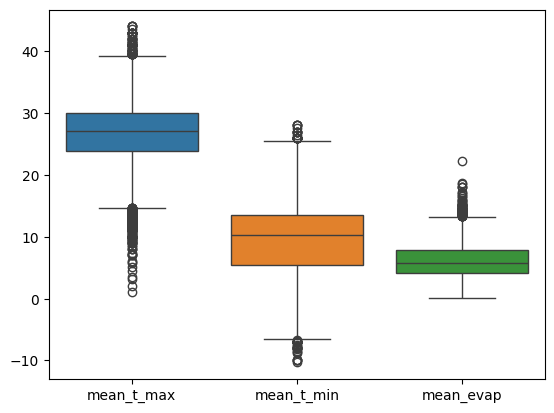

In [10]:
sns.boxplot(daily_mean[['mean_t_max','mean_t_min','mean_evap']])

In [11]:
print(daily_mean.quantile(0.9))
print(daily_mean.quantile(0.1))

mean_rain      3.120000
mean_t_max    32.450000
mean_t_min    15.357143
mean_evap      9.663333
Name: 0.9, dtype: float64
mean_rain      0.000
mean_t_max    20.600
mean_t_min     2.272
mean_evap      3.100
Name: 0.1, dtype: float64


## Análisis de Precipitaciones

### Análisis de precipitación histórica por mes

#### Preparación de los datos

In [17]:
daily_mean['date'] = daily_mean.index
daily_mean['month'] = daily_mean['date'].dt.month
daily_mean['year'] = daily_mean['date'].dt.year
daily_mean.drop(columns='date', inplace=True)

daily_mean.rename(columns={'mean_rain':'rain','mean_t_max':'t_max','mean_t_min':'t_min','mean_evap':'evap'}, inplace=True)

monthly_stats = daily_mean.groupby('month')[['rain','evap','t_max','t_min']].agg('mean')
#monthly_stats['rain_ds'] = daily_mean.groupby('month')[['rain','evap','t_max','t_min']].agg('std')
# order the months

yearly_stats_sum = daily_mean.groupby('year')[['rain','evap','t_max','t_min']].agg('sum')
yearly_stats_mean = daily_mean[daily_mean['rain']>0].groupby('year')[['rain','evap','t_max','t_min']].agg('mean')
historic_month_stats_sum = daily_mean.groupby(['month', 'year'])[['rain','evap','t_max','t_min']].agg('sum')
historic_month_stats_mean = daily_mean[daily_mean['rain']>0].groupby(['month', 'year'])[['rain','evap','t_max','t_min']].agg('mean')

C:\Users\guill\AppData\Local\Temp\ipykernel_21124\1332495145.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\guill\AppData\Local\Temp\ipykernel_21124\1332495145.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\guill\AppData\Local\Temp\ipykernel_21124\1332495145.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

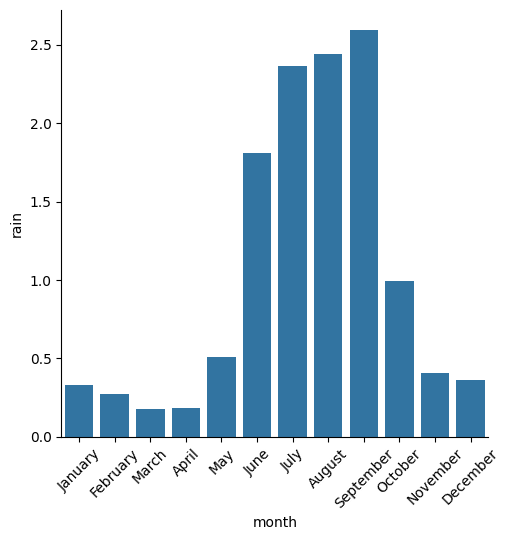

In [19]:
monthly_stats_graph = sns.catplot(monthly_stats, x='month', y='rain', kind='bar')
monthly_stats_graph.set_xticklabels(labels=list(calendar.month_name[1:]),rotation=45)

#### Gráfico Mensual Histórico de precipitaciones promedio

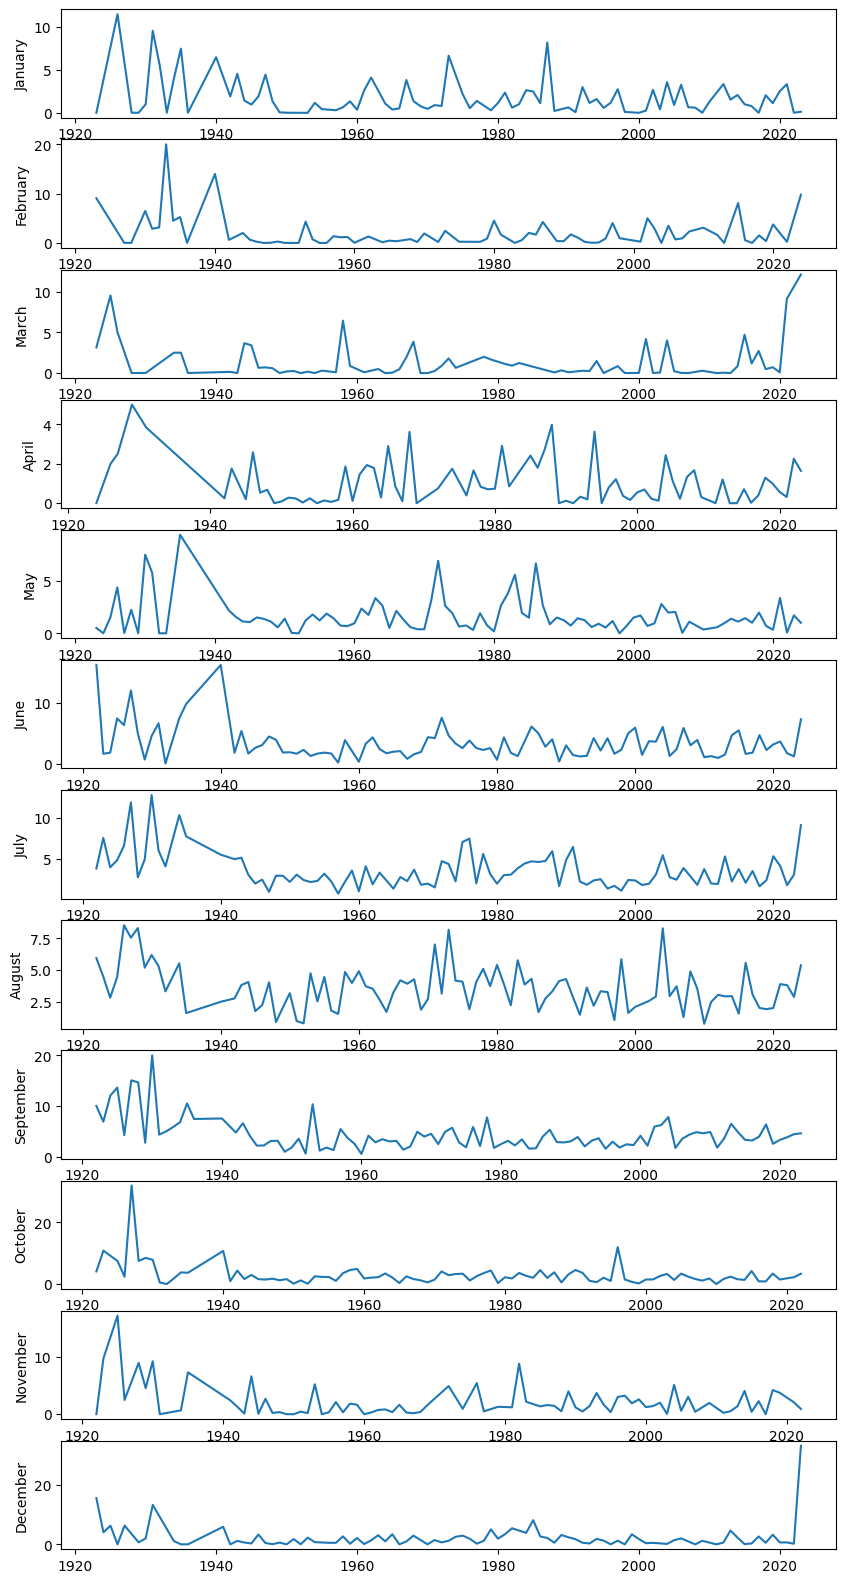

In [20]:
# Promedio
fig, ax = plt.subplots(12,1, figsize = (10,20))
for month in range(1,13):
    ax[month-1].plot(historic_month_stats_mean['rain'].loc[month])
    ax[month-1].set_ylabel(calendar.month_name[1:][month-1])

##### Gráfico Mensual Historico de precipitaciones acumuladas

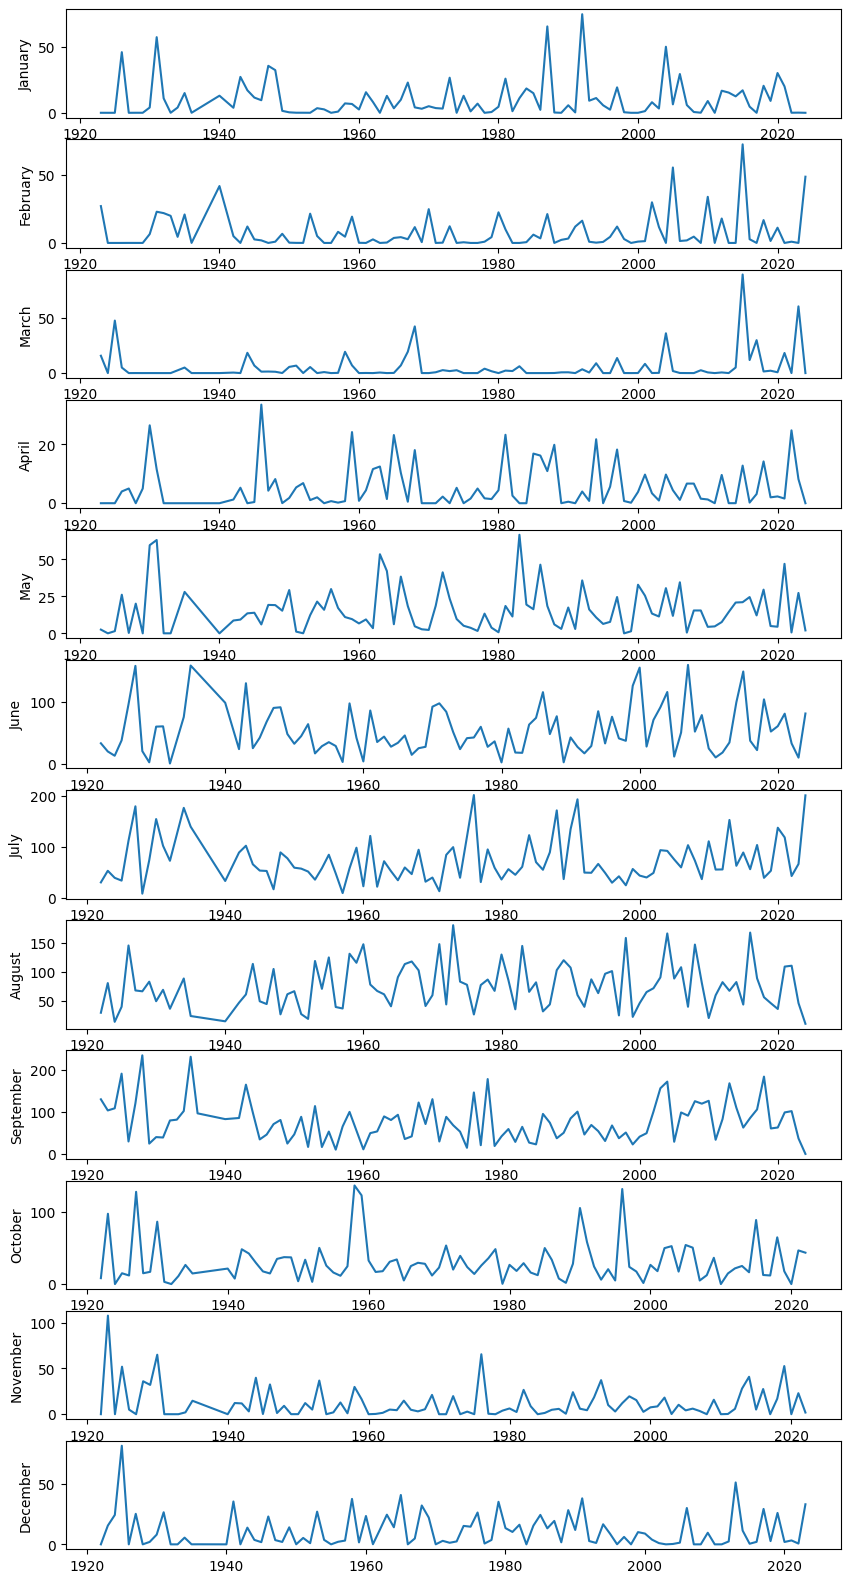

In [21]:
# Promedio
fig, ax = plt.subplots(12,1, figsize = (10,20))
for month in range(1,13):
    ax[month-1].plot(historic_month_stats_sum['rain'].loc[month])
    ax[month-1].set_ylabel(calendar.month_name[1:][month-1])

#### Análisis de precipitación histórica por año

In [30]:
# LLuvia total acumulada
px.line(yearly_stats_sum,y='rain', title='LLuvia total Acumulada por año')

In [31]:
# Lluvia promedio en días de lluvia
px.line(yearly_stats_mean, y='rain', title='Lluvia promedio diaria por año')

In [29]:
df_days_of_rain = daily_mean[daily_mean['rain']>0].groupby('year').count()
px.line(df_days_of_rain, y='rain', title='Dias de lluvia por año')

## Análisis de Temperaturas y Evaporación

C:\Users\guill\AppData\Local\Temp\ipykernel_21124\1130660323.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



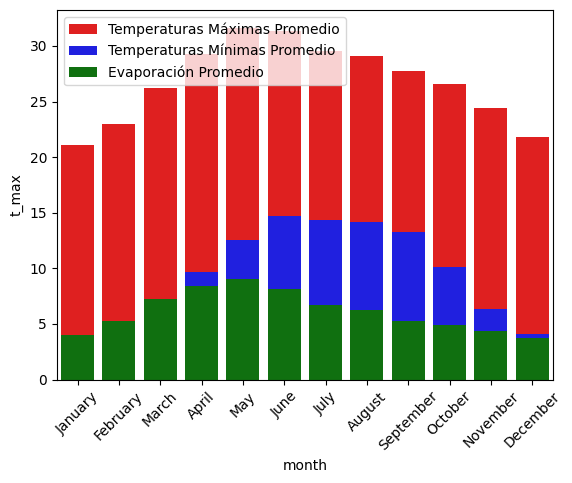

In [25]:
f, axe = plt.subplots()
sns.barplot(monthly_stats, x='month', y='t_max', label = 'Temperaturas Máximas Promedio', color='red', ax = axe)
sns.barplot(monthly_stats, x='month', y='t_min', label = 'Temperaturas Mínimas Promedio', color='blue', ax = axe)
sns.barplot(monthly_stats, x='month', y='evap', label = 'Evaporación Promedio', color = 'green',ax = axe)
tick=axe.set_xticklabels(calendar.month_name[1:], rotation=45)

### Análisis de temperaturas y evaporación mensual histórica

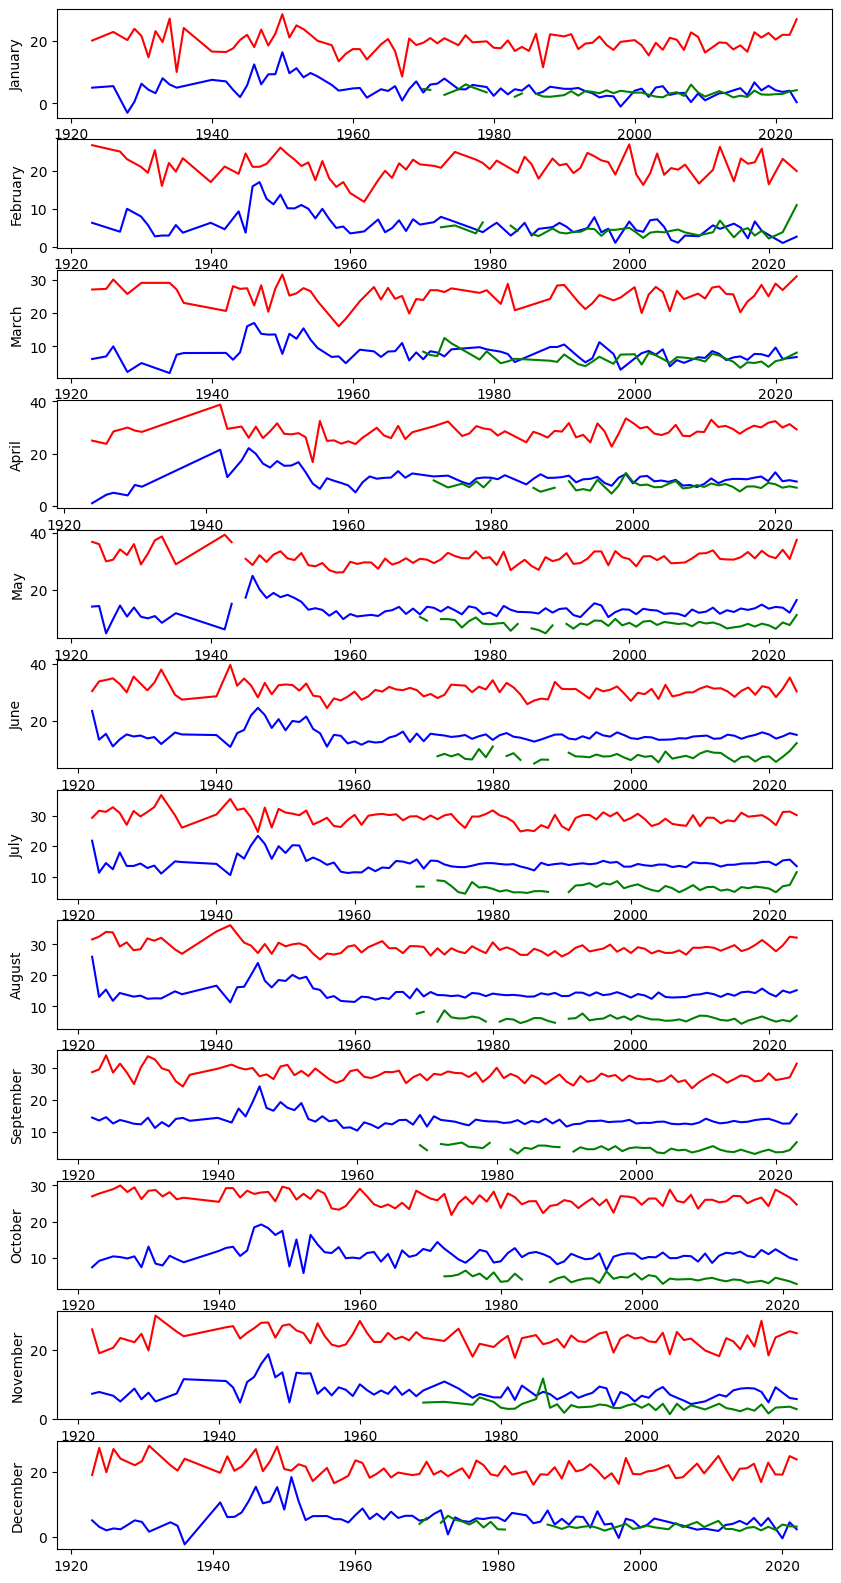

In [26]:
# Promedio
fig, ax = plt.subplots(12,1, figsize = (10,20))
for month in range(1,13):
    ax[month-1].plot(historic_month_stats_mean['t_max'].loc[month], color ='red')
    ax[month-1].plot(historic_month_stats_mean['t_min'].loc[month], color = 'blue')
    ax[month-1].plot(historic_month_stats_mean['evap'].loc[month], color = 'green')
    ax[month-1].set_ylabel(calendar.month_name[1:][month-1])

### Análisis de temperaturas y evaporación anual histórica promedio

In [28]:
# LLuvia total acumulada
px.line(yearly_stats_mean[['t_max','t_min','evap']], title='Temperatura anual promedio y evaporación')